In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates=['Date'],index_col='Date')

In [3]:
data = df['Temp'].values

In [5]:
train_size = int(len(data)*0.8)
train, test = data[:train_size], data[train_size:]

In [7]:
#walk forward validation
history = train.tolist()
predictions = []
for t in test:
    model = AutoReg(history, lags = 7)
    model_fit = model.fit()
    
    y_pred = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(y_pred)
    
    history.append(t)

1. Convert the train dataset into a list(history).
2. Loop over the test dataset, preprocessing one observation at a time.
3. Train an AR model using the availabilty history(past 7 values).
4. Predict the next values and store it.
5. Update the history with the actual test value (walk-forward process).
6. Repeat for all values.

In [8]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Walk-Forward Validation RMSE: {rmse:.4f}')

Walk-Forward Validation RMSE: 2.2411


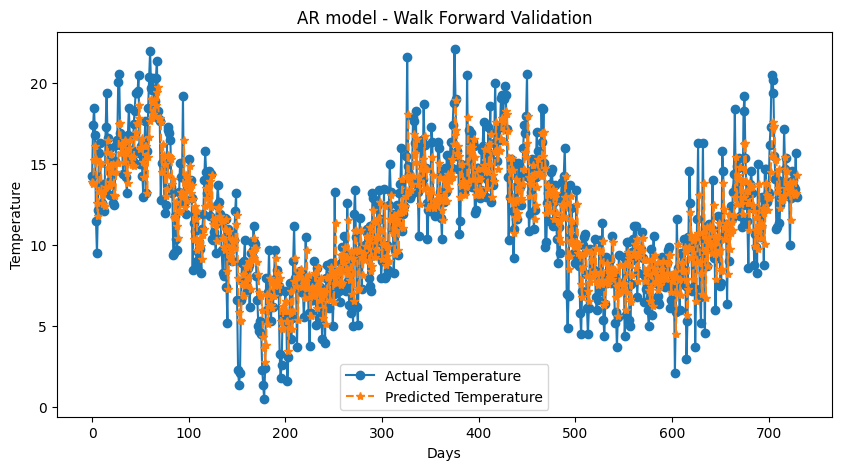

In [11]:
plt.figure(figsize=(10,5))
plt.plot(test, label='Actual Temperature', marker='o')
plt.plot(predictions, label='Predicted Temperature', marker='*', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title("AR model - Walk Forward Validation")
plt.legend()
plt.show()